# Collaboration: git distribué

Je suppose que git a été configuré (name, email, ...) sur l'ordinateur de travail.

La plupart des opérations données ci-après peuvent-être réalisées dans tel ou tel environnement graphique (pycharm, visual studio, git desktop, ...). 

Mais, j'utiliserai le **langage universel** de la ligne de commande auxquel tout informaticien doit être initié.

*Utilisez la table des matières pour ouvrir/fermer chaque section.*

## Créer un dépôt publique sur github

### Cas 1: Au démarrage d'un projet

[vidéo](https://vimeo.com/479261473)

1. On se connecte sur github et on sélectionne «new repository»:

   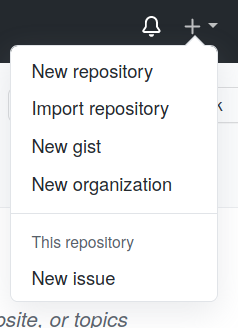

   Il suffit alors de choisir un nom pour le dépôt et de valider:

   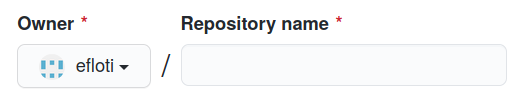

2. Enfin, sur son *ordinateur de travail*, on clone ce dépôt publique (soit en ligne de commande soit avec *un éditeur graphique* qui intègre git) 

   En ligne de commande et dans les grandes lignes:

        git clone <url_depot> # clonage
        cd <nom_depot>
        ... travail ...
        git push origin <branche> # mise à jour du dépôt public.

### Cas 2: on a déjà un projet dans un dossier local *mon_projet*

[vidéo](https://vimeo.com/479262299)

1. Mettre le dossier *mon_projet* en suivi de version (dépôt local):

        cd ..../mon_projet
        git init
        git add <fichiers intéressants>
        git commit -m "premier commit"

2. Créer un dépôt publique vide sur github (voir cas 1),

3. Configurer votre dépôt local et pousser:

        git remote add origin <url_depot_publique>
        git push --set-upstream origin master
        # ... et autres réglages éventuels

### Cas 3: se préparer à contribuer à un dépôt publique existant

[vidéo](https://vimeo.com/479262980)

1. sur github, on réalise un «fork» (duplication) du dépôt publique visé avec le bouton de même nom (en haut à droite):

   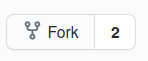

2. Sur l'ordinateur de travail, on **clone** *notre copie publique* du dépôt principal (notre *fork*):

        git clone <url_mon_fork>

3. On **configure** son dépôt local afin de pouvoir tirer les nouveautés depuis le dépôt principal (celui auquel on veut contribuer):

   1. on nomme le dépôt «principal»:
   
            git remote add principal <url_depot_principal>
        
   2. on crée une branche de suivie «principal/master» en «chargeant» \[*fetch\]* (voir avec git log):
        
            git fetch principal master
   
   3. on règle la branche local «master» pour qu'elle suive la branche de suivie:
        
            git branch --set-upstream-to=principal/master master
   
   4. Pour «tirer» \[*pull*\] les nouveautés du dépôt principal: (master et principal/master doivent pointer un même commit):
       
            # s'assurer d'être sur la branch master
            git checkout master
            # puis «tirer»:
            git pull

4. Créer une branche de contribution nommée (par exemple!) *contrib* (c'est dans cette branche que vous travaillerez la plupart du temps):

            # création de la branche «contrib»
            git branch contrib
            # on se place dessus pour ... contribuer!
            git checkout contrib
            # travail: git add <quoi>, git status , ...
            # Une fois arrivé à quelque chose de suffisamment solide:
            git commit -m "implémentation de la fn ..."
            # puis on «pousse» sur son fork github
            git push origin contrib

5. On souhaite que notre modification soit intégrée au dépôt principal: on va sur notre dépôt de *fork* et on lance une «pull-request» (requête de tirage).

   Le mainteneur reçoit la requête et intègre (ou non) les modifications. **Je suppose qu'il les a intégré**.

6. On veut à nouveau travailler:
    1. on «tire» sur le dépôt principal pour mettre à jour notre dépôt local:
            git checkout master
            git pull
    2. on intègre les nouveaux commits dans notre branche de contribution:
            git checkout contrib
            git merge master
    3. le cycle sur la branch *contrib* se poursuit: travail, commit, pousser sur notre fork, demande de tirage ...

## Organisation du travail collaboratif avec github

### Cas 1: je travaille seul sur **mon** projet

La vie est plus *simple* lorsqu'on est seul ... (vraiment?)

Il vous suffit de créer un dépôt publique, de le cloner et d'y mettre à jour régulièrement votre projet (git push ...): une seule branche de travail *master*.

Si quelqu'un veut (tout à coup) contribuer:
    
- soit vous lui donnez les droit d'écriture sur votre dépôt (via l'interface de github) et convenez d'une organisation (voir **cas 2**),
- soit il «fork» votre dépôt et vous envoie des «pull-request» que vous intégrez ou non (à lui de bien s'organiser, ce n'est pas votre affaire!).

### Cas 2: nous travaillons **à deux** (ou trois...) sur un projet

[vidéo](https://vimeo.com/479354904)

Mettons qu'**Alice** et **Bob** travaille sur un projet:

1. L'un des deux, mettons **Alice**, crée un dépôt publique et *donne les droits en écriture* (via l'interface de github) à son camarade Bob.

2. chacun clone **le** dépôt (qui est donc nommé *origin*) sur **sa** machine,

3. puis crée **sa** branche de travail (par ex avec son nom) et se place dessus pour ... travailler (mettons que ce soit **Bob**):

        git branch bob
        git checkout bob

4. lorsque **Bob** (mettons) a fini de travailler, il produit une validation (commit).

        # sur la branche «bob»
        git add <fichiers intéressants>
        git commit -m "message de commit"

5. **avant de pousser sur le dépôt distant**, il *met à jour* son dépôt (on ne sait jamais):

        git checkout master
        git pull origin master

6. puis **fusionne** (si besoin!) les nouveautés éventuelles de la branche master dans la sienne (il devra peut-être gérer quelques conflits de fusion):

        git checkout bob
        git merge master

7. Il se prépare à pousser:
    
        git checkout master
        # mise à jour en «avance rapide» de la branche master
        git merge bob

   ... puis pousse sur le dépôt publique:
        
        git push origin master

8. Le cycle reprend aussi bien pour **Alice** que pour **Bob** au point 4.

### Cas 3: nous sommes **toute une équipe** sur un projet

[vidéo](https://vimeo.com/479306817)

On suppose que le projet est mis sur un dépôt publique maintenu par **Z**. Seul **Z** peut pousser sur ce dépôt que nous appelerons dépôt **principal**; **Z** en est le «garant» ou «mainteneur».

Quatres personnes **A** (Alice), **B** (Bob), **C** et **D**  participent au projet en plus de **Z**; cette liste est bien évidemment *non limitative*.

Chacune d'elles va suivre le *cas 3 - se préparer à contribuer à un dépôt publique existant* (voir plus haut):

1. faire un **fork** du dépôt principal dans son espace sur github (publique)
2. **cloner** ce fork dans son espace de travail (privé),
3. créer une **branche de contribution** *contrib* dans son clone (laquelle sera poussée ultérieurement sur le fork),
4. **configurer** la branche locale *master* de façon à pouvoir la synchroniser (via un *pull*) avec le dépôt *principal*.

Voici une vue d'ensemble de la situation:

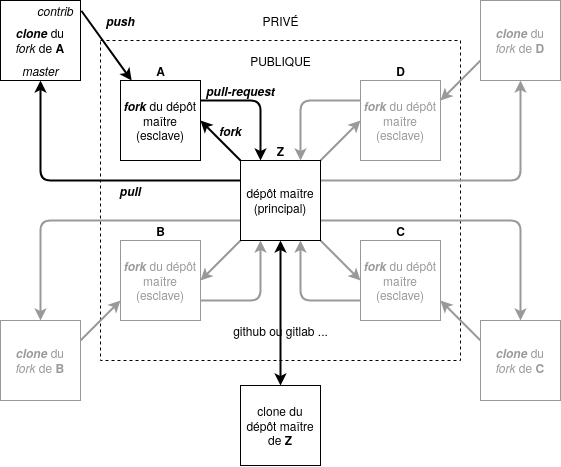

Dans ce modèle, mettons que **A**lice veuille se mettre à travailler au projet.

Elle commence par se mettre - *checkout* - sur la branche **master** pour la mettre à jour et donc tire - *pull* - sur le dépôt principal:

- **cas 1 - aucune nouveautés**: elle se met sur sa branche **contrib**, travaille, valide et enfin pousse - *push* sa branche **contrib** sur son dépôt publique.

  Elle se rend sur son dépôt publique et lance une **pull-request** (requête de tirage).
  
- **cas 2 - il y a des changements**: elle peut consulter l'historique avec *git log --oneline --graph --all* (ou un alias si elle en a définie un...) et examiner la situation: notamment la situation de sa branche **contrib** par rapport à sa branche **master** fraîchement actualisée. 

  Puis, elle passe sur sa branche **contrib** pour fusionner - *merge* - les nouveaux commits de la branche master (*git merge master*) **dans** sa branche contrib; règle les conflits s'il y en a. À la fin de ce processus elle est de nouveau prête à travailler comme dans le **cas 1**.

Les autres procèdent similairement à Alice: ils n'ont pas nécessairement connaissance les uns des autres dans un tel processus (autrement qu'en consultant l'historique des commits), seul le mainteneur a une vision d'ensemble.

# Intégration de git dans certains «environnement»

- **jupyterhub**: voir ou revoir [la vidéo de Organistation - cas 3](https://vimeo.com/479306817),
- [**pycharm**](https://vimeo.com/479350652),
- **visual studio** (ou *vscodium* - son fork libre) - à venir.